
# Обучение с учителем

## Task 1

In [5]:
import pandas as pd
import numpy as np

In [9]:
# !pip install sklearn
import sklearn.datasets

In [12]:
from sklearn.datasets import load_boston

In [17]:
boston = load_boston()

In [18]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [24]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [27]:
feature_names = boston['feature_names']
target = boston['target']
data = boston['data']

In [35]:
target[:2]

array([24. , 21.6])

In [43]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [46]:
y = pd.DataFrame(target, columns=['price'])
y.info()
y.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
np.shape(X_test), np.shape(X_train)

((152, 13), (354, 13))

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
lr = LinearRegression()

In [65]:
type(lr)

sklearn.linear_model._base.LinearRegression

In [66]:
lr.fit(X_train, y_train)

LinearRegression()

In [76]:
y_pred = lr.predict(X_test)
check_test = pd.DataFrame({'y_test': y_test['price'], 'y_pred': y_pred.flatten()}, columns = ['y_test', 'y_pred'])

In [79]:
check_test.head()

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280


In [80]:
from sklearn.metrics import r2_score

### Resulting R2

In [82]:
r2_score(y_test, y_pred)

0.7112260057484974

Любопытно: в видеоуроке деление было 80 на 20%, а результат лучше здесь 
Так ведь и планировалось?

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

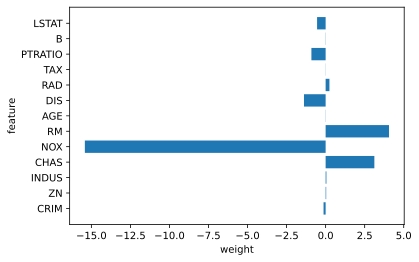

In [89]:
plt.barh(feature_names, lr.coef_.flatten())

plt.xlabel('weight')
plt.ylabel('feature')

plt.show()


## Task 2